## Test for Hadamard Gate

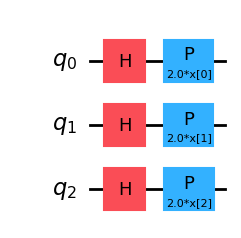

In [1]:
from qiskit.circuit.library import ZFeatureMap

ZFeatureMap(feature_dimension=3, reps=1).decompose().draw('mpl')

# the ones in the blue boxes are the ones called Z-rotation gates

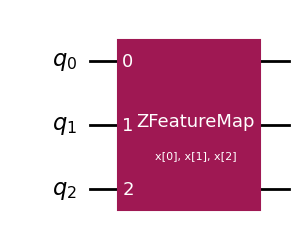

In [2]:
# 3 features, depth 2
map_z = ZFeatureMap(feature_dimension=3, reps=2)
map_z.draw('mpl')

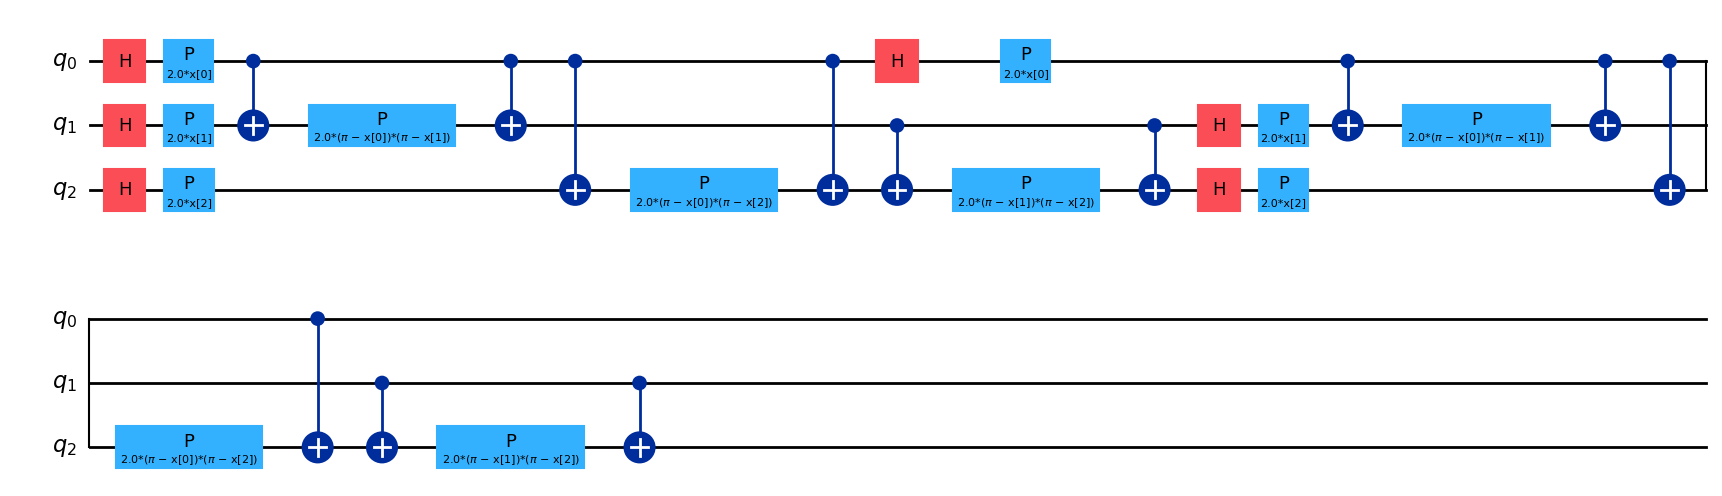

In [3]:
from qiskit.circuit.library import ZZFeatureMap

# 3 features, depth 1
map_zz = ZZFeatureMap(feature_dimension=3, reps=2)
map_zz.decompose().draw('mpl')  # Decomposes the feature map into its gate-level components

# pakai DECOMPOSE to see well, more detail

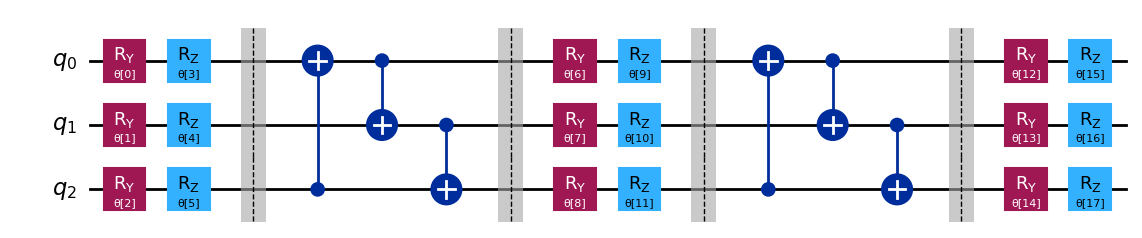

In [4]:
from qiskit.circuit.library import TwoLocal

twolocal = TwoLocal(
    num_qubits=3,             # You are using 3 qubits
    reps=2,                   # Repeat the full block 2 times
    rotation_blocks=['ry', 'rz'],     # Apply both Ry and Rz gates to each qubit
    entanglement_blocks='cx',         # Use CNOT (CX) gates for entanglement
    entanglement='circular',          # Connect qubits in a circular pattern: 0→1→2→0
    insert_barriers=True              # Add barriers to separate layers (for visualization)
)
twolocal.decompose().draw('mpl')          # Draw the full circuit

# Each repitition consists of 1. rotation layer 2. entanglement layer
# insert_barriers = True - adds gray vertical lines to seperate rotation, entanglement, next repitition
# BUAT REPITITION SIALL

## NLocal circuit with a rotation block on 2 qubits and entanglement block on 4 qubits using linear entanglement


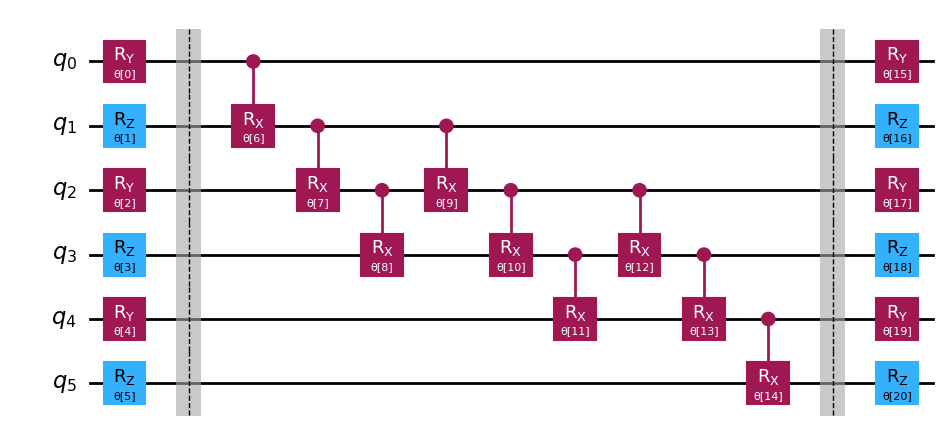

In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import NLocal

# rotation block :
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0 , 1)
ent.crx(params[1], 1 , 2)
ent.crx(params[2], 2 , 3)

nlocal = NLocal(
    num_qubits=6,             # You are using 3 qubits                  
    rotation_blocks=rot,     # Apply both Ry and Rz gates to each qubit
    entanglement_blocks=ent,         # Use CNOT (CX) gates for entanglement
    entanglement='linear',          # Connect qubits in a circular pattern: 0→1→2→0
    insert_barriers=True              # Add barriers to separate layers (for visualization)
)
nlocal.decompose().draw('mpl')

## Encode first training sample using the ZZFeatureMap

In [ ]:
# Import required packages
'''

from qiskit.circuit.library import ZZFeatureMap
import numpy as np
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

# Step 1: Define a small training dataset with 1 sample (4 features)
sample_train = np.array([[-0.79923362, -0.26571862, -0.16474421, -0.17815209]])

# Step 2: Create the ZZFeatureMap (you can adjust reps and entanglement as needed)
feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement='linear', insert_barriers=True)

# Step 3: Encode the classical sample into the quantum circuit
encode_circuit = feature_map.bind_parameters(sample_train[0])

# Step 4: Visualize the encoded circuit
encode_circuit.draw(output='mpl')

'''


AttributeError: 'ZZFeatureMap' object has no attribute 'bind_parameters'

## Quantum Kernel Estimation

In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel

print(sample_train[0])
print(sample_train[1])

# Define your feature map
zz_feature_map = ZZFeatureMap(feature_dimension=4, reps=2, entanglement='linear')

# Create the quantum kernel from the feature map
zz_kernel = QuantumKernel(feature_map=zz_feature_map)

zz_circuit = zz_kernel.construct_circuit(sample_train[0], sample_train[1])
zz_circuit.decompose().decompose().draw(output='mpl')


ImportError: cannot import name 'QuantumKernel' from 'qiskit_machine_learning.kernels' (c:\Users\User\anaconda3\envs\fypproj\Lib\site-packages\qiskit_machine_learning\kernels\__init__.py)

In [ ]:
from qiskit import Aer, execute

backend = Aer.get_backend('qasm_simulator')
job = execute(zz_circuit, backend, shots = 8192,
              seed_simulator=1024, seed_transpiler=1024)
counts = job.result().get_count(zz_circuit)

In [ ]:
counts['0000']/sum(counts.values())

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
sample_train = X_train
sample_test = X_test

# Compute the quantum kernel matrices
matrix_train = zz_kernel.evaluate(x_vec=sample_train) # show how similar two training points are
matrix_test = zz_kernel.evaluate(x_vec=sample_test, y_vec=sample_train) # compares test points to training points

# Plot the training and testing kernel matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.asmatrix(matrix_train), interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("Training Kernel Matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("Testing Kernel Matrix")

plt.show()


NameError: name 'X_pca' is not defined